<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 2.2.2

## Statistical Proof

### Part 1: Student's t-Test

The *t*-test is probably the most used statistical test. It measures the likelihood that a sample belongs to a given distribution, and incorporates a correction for the finite size of the sample.

#### Using the t-test to compare two means

Here, suppose we have two sets of measurements and we want to know if they both came from the same distribution.

For example, in [this](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data) dataset these could be age of house in one group and median value of house in another group, and we are testing the null hypothesis that there is no difference between the two groups.

#### Collect Data

You can find the original data [here](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data).

Data dictionary is available [here](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html).

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import pandas as pd

from scipy import stats
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
data = pd.read_csv(r"C:\Users\OmarZazou\OneDrive - Ediom Pty Ltd\Documents\Resources\Data Science Course\Course Material\DATA\housing.data", header=None, names=names, delim_whitespace=True)

In [3]:
# Head
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
# Shape
data.shape

(506, 14)

##### 1. Plot Histogram of `RM`

Text(0.5, 1.0, 'Distribution of Average Number of Rooms')

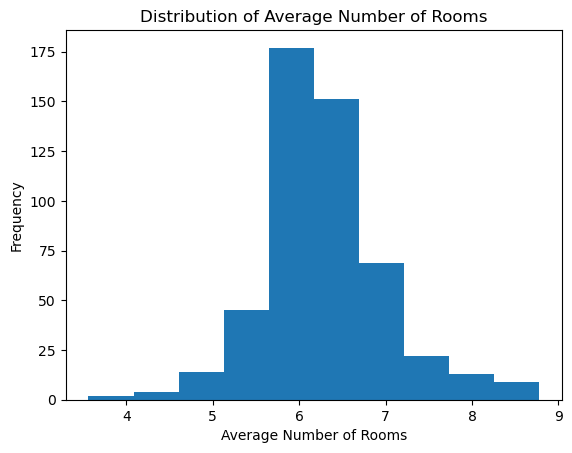

In [5]:
#  ANSWER
RM = data.RM
data.RM.plot(kind='hist')
plt.xlabel('Average Number of Rooms')
plt.title('Distribution of Average Number of Rooms')

##### 2. Plot Histogram of `MEDV`

Text(0.5, 1.0, 'Distribution of Median Value of Homes')

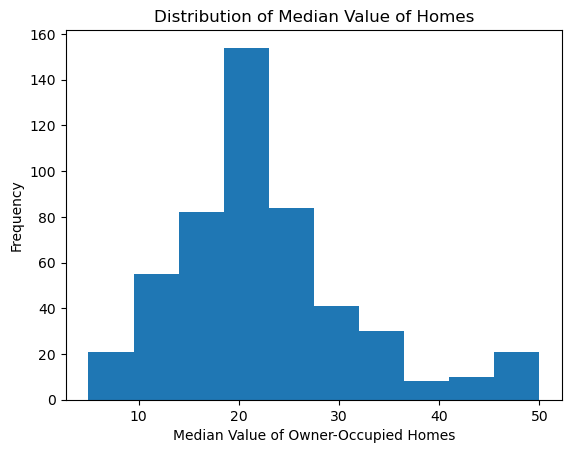

In [6]:
# ANSWER
MEDV = data.MEDV
MEDV.plot(kind='hist')
plt.xlabel('Median Value of Owner-Occupied Homes')
plt.title('Distribution of Median Value of Homes')

##### 3.A Draw Scatter Plot of `RM` & `MEDV`

Text(0.5, 1.0, 'Average Number of Rooms vs Median Value of Dwelling')

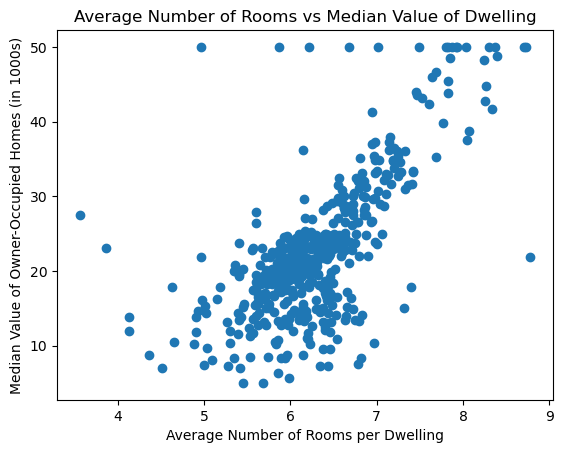

In [8]:
# ANSWER
plt.scatter(RM, MEDV)
plt.xlabel('Average Number of Rooms per Dwelling')
plt.ylabel('Median Value of Owner-Occupied Homes (in 1000s)')
plt.title('Average Number of Rooms vs Median Value of Dwelling')

##### 3.B Is there any trend? State your observation.

**ANSWER:**: The trend seems to be that the higher the number of rooms the higher the value of the dwelling. However, there are some outliers.

There tends to be a positive corrleation between the number of rooms and the median value of the house. There are some outliers however.

We'll be using following steps:

- Define hypothesis
- Set alpha (Let alpha = 0.05)
- Calculate point estimate
- Calculate test statistic
- Find the p-value
- Interpret results

##### 4. Define Hypothesis

Let's assume if `RM` of house is more than 6, they are large house. Other houses are small. Price of houses increases when the `RM` increases.

**ANSWER:**

    H0: There is no difference between distribution of `Large House` & `Small House`
    H1: There is difference between distribution of `Large House` & `Small House`
    
**[Note]** _If you want you can explore the dataset and define different hypothesis._

##### 5. Set alpha (Let alpha = 0.05)

First, we should specify our criterion for statistical significance. Traditionally, we allow for no more than a 1-in-20 chance of a spurious rejection of the null hypothesis:

In [32]:
# ANSWER
alpha =0.05

##### 6. Set Data

Now, let's create two sets of data
- Large House: Houses which have more than 6 rooms.
- Small House: Houses which have less than 6 rooms.

Take sample of 100 houses in each dataset.

In [11]:
# ANSWER
N=100
medv_large = data[data['RM'] > 6]['MEDV'].sample(N, random_state=1)
medv_small = data[data['RM'] <= 6]['MEDV'].sample(N, random_state=1)

##### 6.A [BONUS] Build histogram for both `Large House` & `Small House`

Text(0.5, 1.0, 'Distribution of Dwelling Median Values')

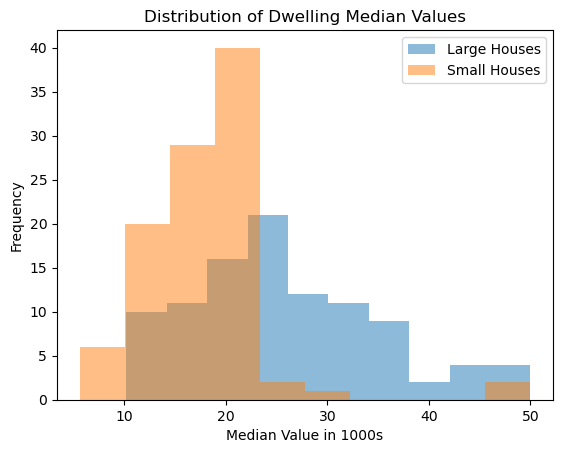

In [22]:
# ANSWER
plt.hist(medv_large, label='Large Houses', alpha=0.5)
plt.hist(medv_small, label='Small Houses', alpha=0.5)
plt.legend(loc='upper right')
plt.xlabel('Median Value in 1000s')
plt.ylabel('Frequency')
plt.title('Distribution of Dwelling Median Values')

##### 7. Calculate Variance

Calculate variance for both samples.

In [23]:
# ANSWER
medv_lrg_var = medv_large.var()
medv_lrg_var

90.81580909090908

In [24]:
medv_sml_var = medv_small.var()
medv_sml_var

38.825050505050505

##### 8. Calculate Standard Deviation


Because we are dealing with two samples we need to compute the joint standard deviation.

Here sp is the pooled standard deviation for n = n1 = n2 and s^2
X1 and s^2 X2 are the unbiased estimators of the variances of the two samples.

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/f63e99c30c01445668ea2cce9832da0f6810cb4b)

In [26]:
# ANSWER
std = np.sqrt((medv_lrg_var + medv_sml_var) / 2)
print('std dev:', std)

std dev: 8.051113575026736


##### 9. Calculate test statistic

The *t*-statistic depends on the difference between the sample means and their joint standard deviation:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/070d365e1b347ea5f83f0147043868fa120b6646)


In [27]:
# ANSWER
t = (medv_large.mean() - medv_small.mean()) / (std * np.sqrt(2 / N))  # t-statistic
print('t:', t)

t: 6.914635641894043


##### 10. Calculate Degree of Freedom

The number of degrees of freedom is the total number of samples (here, this is N from each set) minus the number of statistics in the computation (1 for each sample mean):

In [28]:
# ANSWER
df = 2 * N - 2
df

198

##### 11. Find the p-value

Now we can compute the probability of the above *t*-statistic from the cumulative density function:

> stats.t.cdf

> p_value = 1 - cdf(t)

In [29]:
# ANSWER
p = 1 - stats.t.cdf(abs(t), df=df)  # #p-value after comparison with the t
print("t = " + str(t))
print("p = " + str(2 * p))

t = 6.914635641894043
p = 6.311529077152045e-11


#### Interpret results

##### 12. Write a Function to Test Significance of `p_value`

Write a function which will take p_value and alpha as input. If p_value < alpha, print reject null hypothesis message. Otherwise print a fail to reject null hypothesis message.

In [30]:
# ANSWER
def Test_Significance(p_value, alpha):
    if p_value < alpha:
        print('We reject our null hypthesis. House price increases for large houses.')
    elif p_value > alpha:
        print('We fail to reject our null hypothesis. House price does not increase for large houses.')
    else:
        print('Our test is inconclusive')

In [33]:
print("t = " + str(t))
print("p = " + str(p*2))
print("alpha = " + str(alpha))
Test_Significance(p*2, alpha)

t = 6.914635641894043
p = 6.311529077152045e-11
alpha = 0.05
We reject our null hypthesis. House price increases for large houses.


##### 13. [Bonus] Write a function to calculate t, p_value from two samples.

Calculate the T-test for the means of *two independent* samples of scores.

This is a two-sided test for the null hypothesis that 2 independent samples
have identical average (expected) values.

In [37]:
# ANSWER
def ttest_func(a, b, alpha):
    
    #Define sample size
    N = len(a)
    
    #Define variance for both samples
    a_var = a.var()
    b_var = b.var()
    
    #Calculate standard deviation
    std = np.sqrt((a_var + b_var) / 2)
    
    #Calculate t-score
    t =(a.mean() - b.mean())/(std * np.sqrt(2/N))
    
    #Define your degrees of freedom
    df = 2 * N - 2
    
    #Calculate p value for 2 tail analysis
    p = 2 * (1 - stats.t.cdf(abs(t), df=df))
    
    return t, p, Test_Significance(p, alpha)

In [39]:
t, p, sig = ttest_func(medv_large, medv_small, alpha)
print("t = " + str(t))
print("p = " + str(p))

We reject our null hypthesis. House price increases for large houses.
t = 6.914635641894043
p = 6.311529077152045e-11


#### Use `Stats` Package

##### 14. Calculate the T-test for the means of *two independent* samples of scores

using following method of stats calculate the T-test for the means of two independent samples of scores.

> ttest_ind

In [40]:
# ANSWER
t2, p2 = stats.ttest_ind(medv_large, medv_small)
print("t = " + str(t2))
print("p = " + str(p2))
Test_Significance(p2, alpha)

t = 6.914635641894043
p = 6.311534316626912e-11
We reject our null hypthesis. House price increases for large houses.




---



---



> > > > > > > > > © 2023 Institute of Data


---



---



